## Decision Trees
- A decision tree is a structure that contains nodes (rectangular boxes) and edges(arrows) . Each node is either used to make a decision (known as decision node) or represent an outcome (known as leaf node).
- Simple Tree like structure, Model makes a Decision at every Node
- Useful in simple tasks
- One of the most popular algorithm
- Easy explainability, easy to show how a decision process works!
- The initial node is called the root node , the final nodes are called the leaf nodes and the rest of the nodes are called intermediate or internal nodes.
- The root and intermediate nodes represent the decisions while the leaf nodes represent the outcomes.

#### Why decision trees are popular
- Easy to interpret and present
- Well defined Logic , mimic human level thought
- Random Forests , Ensembles of decision trees are more powerful classifiers
- Feature Values are preferred to be Categorical . If the values are continuous, then they are discretized prior to building the model


## Build Decision Trees

Two Common Algorithms :

- CART (CLASSIFICATION AND REGRESSION TREES) : uses GINI INDEX (classification) as Metric
- ID3 (ITERATIVE DICHOTOMISER 3) : uses ENTROPY FUNCTION and INFORMATION GAIN as Metrics

- Entropy is the measure of disorder and the Entropy of a dataset is the measure of disorder in the target feature of the dataset.
- Entropy can be used as a calculation of the purity of a dataset, e.g. how balanced the distribution of classes happens to be.
- An entropy of 0 bits indicates a dataset containing one class; an entropy of 1 or more bits suggests maximum entropy for a balanced dataset (depending on the number of classes)
- Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n

- ID3 uses Information Gain or just Gain to find the best feature. Information Gain calculates the reduction in the entropy and measures how well a given feature separates or classifies the target classes. The feature with the highest Information Gain is selected as the best one.
- Information Gain for a feature column A is calculated as: IG(S, A) = Entropy(S) - ∑((|Sᵥ| / |S|) * Entropy(Sᵥ))

where Sᵥ is the set of rows in S for which the feature column A has value v, |Sᵥ| is the number of rows in Sᵥ and likewise |S| is the number of rows in S.

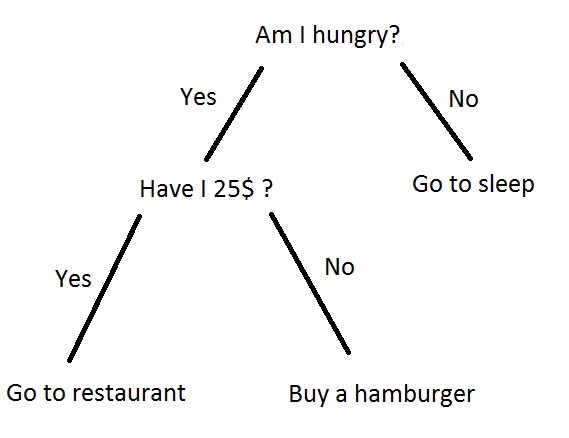

In [2]:
# Importing  essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [8]:
# Loading the dataset
df = pd.read_csv("Iris.csv")
df.shape

(150, 6)

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
# Changing the target variable from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                         #Label Encoding
label = le.fit_transform(df["Species"])

In [13]:
# Dropping the unuseful columns
df = df.drop("Species", axis='columns')
df = df.drop("Id", axis='columns')

In [14]:
# Appending the transformed column 
df["Species"] = label
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Let's check the unique values of our target
df["Species"].unique()

array([0, 1, 2])

In [18]:
df.value_counts(df['Species'])

Species
0    50
1    50
2    50
dtype: int64

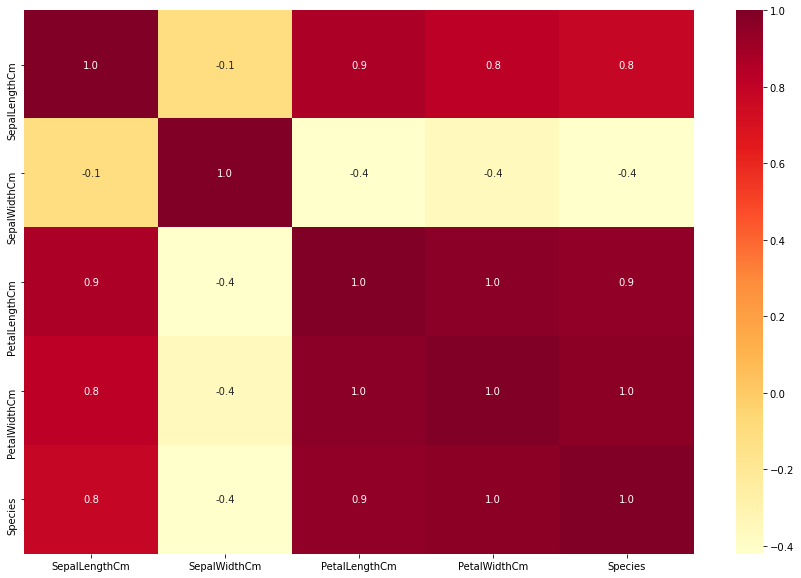

In [16]:
# Visualize the correlation between the features
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt= '.1f', ax=ax, cmap="YlOrRd");

Look at the high correlations in most of the cases!!

In [19]:
# Assigning the dependent and the independent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1]

print(X.shape, y.shape)

(150, 4) (150,)


In [23]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
# Checking the shape of the training and the test data set
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [25]:
# Importing the model and data-fitting
from sklearn.tree import DecisionTreeClassifier
DTT = DecisionTreeClassifier(random_state=0)
DTT.fit(X_train , y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
DTT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [27]:
# Let's predict with the test dataset
y_pred = DTT.predict(X_test)

In [28]:
# Let's see how is the Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



So, the model comes up with 98% accuracy, which is really great. We can use any test data to get desirable outputs for sure. More specifically, the model predicts the species 'Iris-setosa' with 100% accuracy, 'Iris-versicolor' with 97% accuracy and 'Iris-virginica' with 97% accuracy.

In [35]:
# Visualize the Decision Tree
# Setting feature names for the tree visualization
feature_names = list(df.columns[1:])

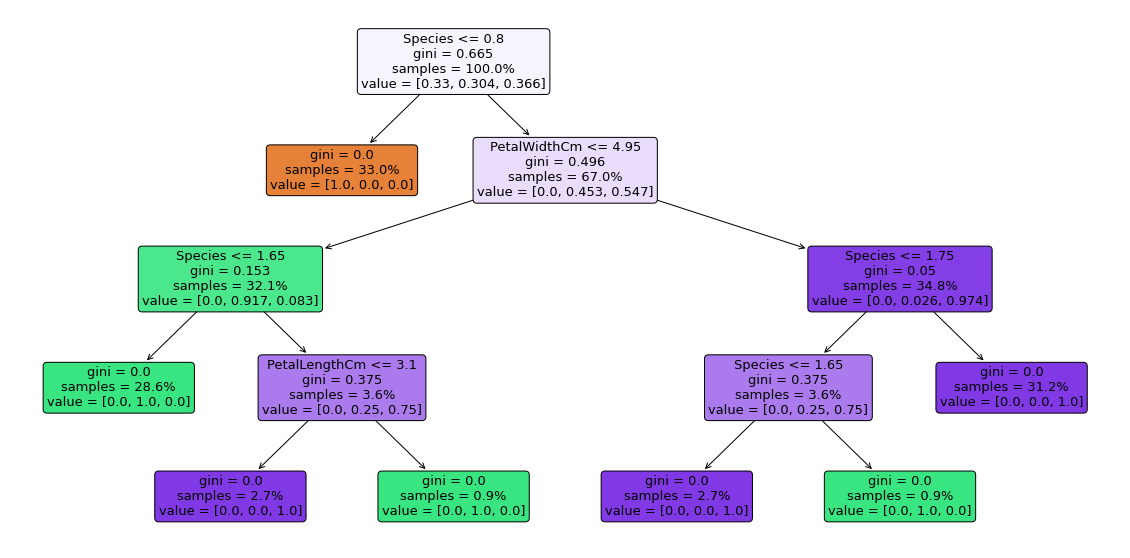

In [36]:
from sklearn import tree
Tree = plt.figure(figsize = (20,10))
Tree = tree.plot_tree(DTT, feature_names = feature_names, fontsize = 13, filled = 'True', proportion = True, rounded = 10)
plt.show()

Hence the desicion tree is shown and the model is built with great accuracy. The Decision Tree Classifier Model is explored successfully.